# Telco Customer Churn
This notebook consists of the following sections in order:
- 1 - Load the Data
- 2 - Exploratory Data Analysis (EDA)
  - 2.1 - Data Pre-Processing
  - 2.2 - Remove Missing Values
  - 2.3 - Customer Demographic Info
  - 2.4 - Customer Account Info
  - 2.5 - Customer Purchase Info
  - 2.6 - Numerical Features
  - 2.7 - Correlation between Features
- 3 - Model and Analysis
  - 3.1 - Compare Standardization and Normalization
    - 3.1.1 - Train-Test Split
    - 3.1.2 - SVM
    - 3.1.3 - Logistic Regression
    - 3.1.4 - Random Forest
  - 3.2 - Feature Selection
    - 3.2.1 - Chi-Squared Test for Categorical Features
    - 3.2.2 - ANOVA F-Test for Numerical Features
    - 3.2.3 - Mutual Information (MI) for Both Types of Features
  - 3.3 - Model Fitting
    - 3.3.1 - Does Not Apply ADASYN
      - 3.3.1.1 - SVM
      - 3.3.1.2 - Logistic Regression
      - 3.3.1.3 - Random Forest
    - 3.3.2 - Balance Classes by ADASYN Oversampling
      - 3.3.2.1 - SVM
      - 3.3.2.2 - Logistic Regression
      - 3.3.2.3 - Random Forest          
  - 3.4 - Multicollinearity
    - 3.4.1 - Remove Tenure
      - 3.4.1.1 - SVM
      - 3.4.1.2 - Logistic Regression
      - 3.4.1.3 - Random Forest     
    - 3.4.2 - Remove TotalCharges
      - 3.4.2.1 - SVM
      - 3.4.2.2 - Logistic Regression
      - 3.4.2.3 - Random Forest
  - Additional Analysis: Hyperparameter Tuning
    - A.1 - SVM
    - A.2 - Logistic Regression
    - A.3 - Random Forest     

## 1 - Load the Data


In [255]:
import pandas as pd
import numpy as np

In [256]:
# load raw data from personal github
telco = pd.read_csv("https://raw.githubusercontent.com/yihan219/sta2101_project/main/WA_Fn-UseC_-Telco-Customer-Churn.csv", header=0)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [257]:
telco.shape

(7043, 21)

In [258]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2 - Exploratory Data Analysis (EDA)

### 2.1 - Data Pre-Processing

In [259]:
# replace label column values to 0 or 1
telco.Churn = telco.Churn.map({'Yes': 1, 'No': 0})

# drop entirely duplicated rows
telco.drop_duplicates(inplace=True)

In [260]:
telco.shape

(7043, 21)

In [261]:
telco.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [262]:
telco.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [263]:
# convert'SeniorCitizen' from {1,0} to {Yes, No} representation so that plots will have meaningful labels
telco.SeniorCitizen = telco.SeniorCitizen.map({1:'Yes', 0:'No'})  
telco.SeniorCitizen.value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [264]:
# count NA values in each column of the dataframe
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [265]:
# check if any strange values might represent missing values in each column 
# all categorical variables have meaningful values
for c in telco.columns:
    if c not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']:
      print("---- %s ---" % c)
      print(telco[c].value_counts())

---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- SeniorCitizen ---
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
---- Partner ---
No     3641
Yes    3402
Name: Partner, dtype: int64
---- Dependents ---
No     4933
Yes    2110
Name: Dependents, dtype: int64
---- PhoneService ---
Yes    6361
No      682
Name: PhoneService, dtype: int64
---- MultipleLines ---
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---- InternetService ---
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---- OnlineSecurity ---
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---- OnlineBackup ---
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---- DeviceProtection ---
No                     3095
Yes                    2422
No int

In [266]:
# 'tenure' column has 0 values, but this makes sense since they represent 
# customers who have just joined the company less than a month
telco.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [267]:
# 'MonthlyCharges' column does not contain 0 values, which makes sense because
# all customers must pay for the service hence have a minimum monthly charge
telco.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [268]:
# the dtype of column 'TotalCharges' is object, which is suspicious as it might contains non-numeric values
# there are 11 " " values in the column, since they only account for a small proportion of the entire dataset, 
# I simply discarded those rows
telco[['TotalCharges']].sort_values(by='TotalCharges',ascending=True)

,TotalCharges
936,
3826,
4380,
753,
5218,
...,...
6646,997.75
5598,998.1
3686,999.45
3353,999.8


### 2.2 - Remove Missing Values

In [269]:
# removing rows from telco with TotalCharges=" "
telco = telco[telco.TotalCharges!=" "]
telco.reset_index(drop=True, inplace=True)
telco.shape

(7032, 21)

In [270]:
# convert column 'TotalCharges' to numeric
telco.TotalCharges = pd.to_numeric(telco.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [271]:
telco['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### 2.3 - Customer Demographic Info

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

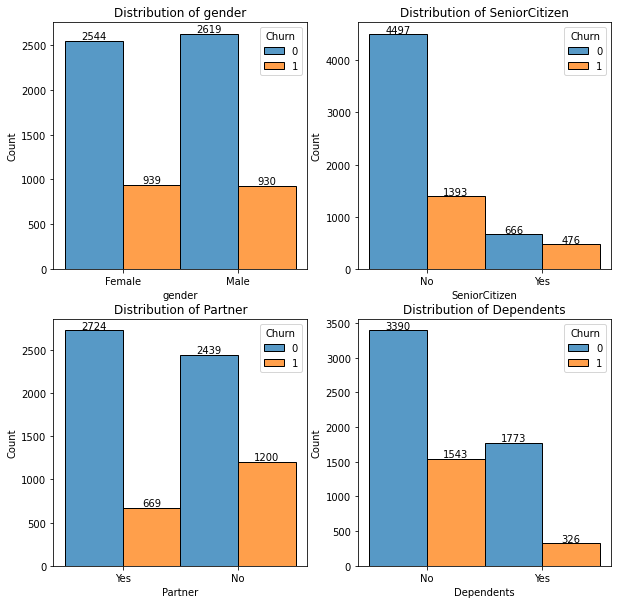

In [273]:
# plot histogram 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
index = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]
for i,j in zip(["gender", "SeniorCitizen", "Partner", "Dependents"],index):
  ax = sns.histplot(data=telco, x=i, hue="Churn", multiple="dodge", ax=j)
  ax.set(title='Distribution of {}'.format(i))
  # label each bar in histogram
  for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+20, # y-coordinate position of data label, padded 20 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
plt.show()  

In [274]:
# contingency table for gender by churn status
pd.crosstab(telco.gender, telco.Churn, margins=True)

Churn,0,1,All
gender,,,
Female,2544,939,3483
Male,2619,930,3549
All,5163,1869,7032


In [275]:
# contingency table for seniorcitizen by churn status
pd.crosstab(telco.SeniorCitizen, telco.Churn, margins=True)

Churn,0,1,All
SeniorCitizen,,,
No,4497,1393,5890
Yes,666,476,1142
All,5163,1869,7032


In [276]:
# contingency table for partner by churn status
pd.crosstab(telco.Partner, telco.Churn, margins=True)

Churn,0,1,All
Partner,,,
No,2439,1200,3639
Yes,2724,669,3393
All,5163,1869,7032


In [277]:
# contingency table for dependents by churn status
pd.crosstab(telco.Dependents, telco.Churn, margins=True)

Churn,0,1,All
Dependents,,,
No,3390,1543,4933
Yes,1773,326,2099
All,5163,1869,7032


### 2.4 - Customer Account Info

In [278]:
# contingency table for phoneservice by churn status
pd.crosstab(telco.PhoneService, telco.Churn, margins=True)

Churn,0,1,All
PhoneService,,,
No,510,170,680
Yes,4653,1699,6352
All,5163,1869,7032


In [279]:
# contingency table for internetservice by churn status
pd.crosstab(telco.InternetService, telco.Churn, margins=True)

Churn,0,1,All
InternetService,,,
DSL,1957,459,2416
Fiber optic,1799,1297,3096
No,1407,113,1520
All,5163,1869,7032


In [280]:
# contingency table for internetservice by churn status, shown as proportion of each column
pd.crosstab(telco.InternetService, telco.Churn, margins=True, normalize='columns')

Churn,0,1,All
InternetService,,,
DSL,0.379043,0.245586,0.343572
Fiber optic,0.348441,0.693954,0.440273
No,0.272516,0.060460,0.216155


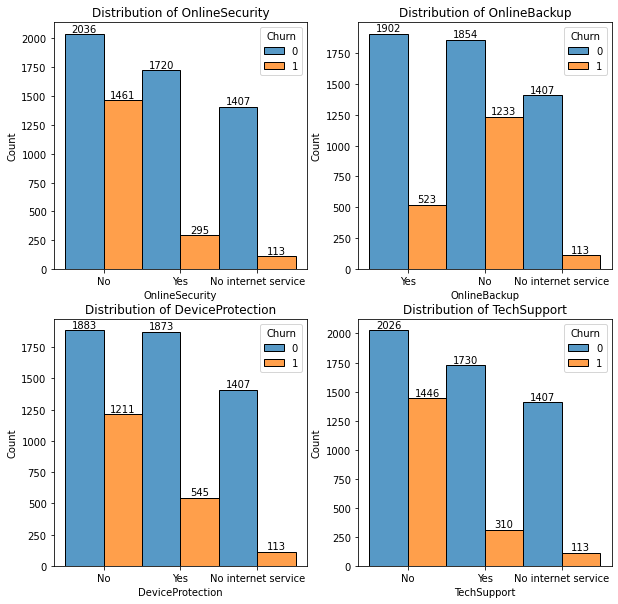

In [281]:
# plot histogram 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
index = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]
for i,j in zip(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"],index):
  ax = sns.histplot(data=telco, x=i, hue="Churn", multiple="dodge", ax=j)
  ax.set(title='Distribution of {}'.format(i))
  # label each bar in histogram
  for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+20, # y-coordinate position of data label, padded 20 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
plt.show()  

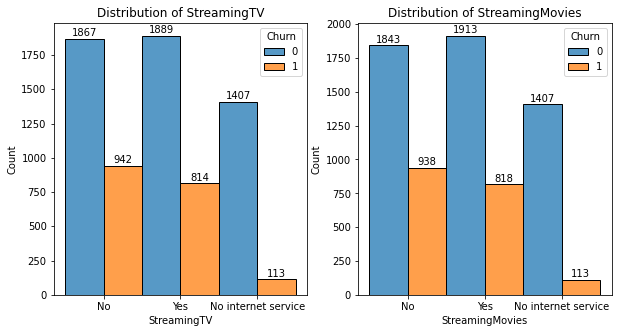

In [282]:
# plot histogram 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
index = [axs[0],axs[1]]
for i,j in zip(["StreamingTV", "StreamingMovies"],index):
  ax = sns.histplot(data=telco, x=i, hue="Churn", multiple="dodge", ax=j)
  ax.set(title='Distribution of {}'.format(i))
  # label each bar in histogram
  for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+20, # y-coordinate position of data label, padded 20 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
plt.show()  

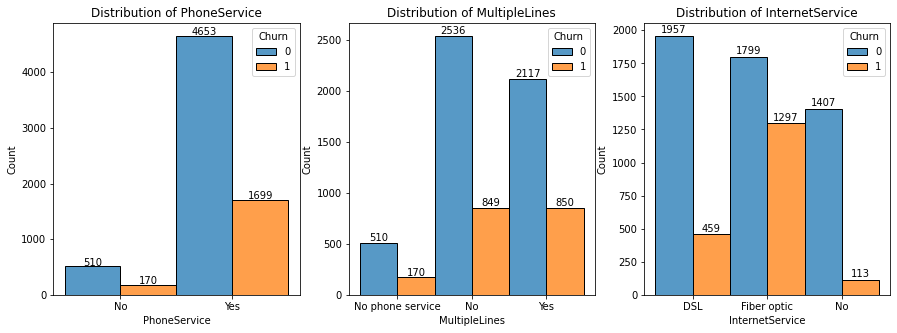

In [283]:
# plot histogram 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
index = [axs[0],axs[1],axs[2]]
for i,j in zip(["PhoneService", "MultipleLines", "InternetService"],index):
  ax = sns.histplot(data=telco, x=i, hue="Churn", multiple="dodge", ax=j)
  ax.set(title='Distribution of {}'.format(i))
  # label each bar in histogram
  for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+20, # y-coordinate position of data label, padded 20 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
plt.show()  

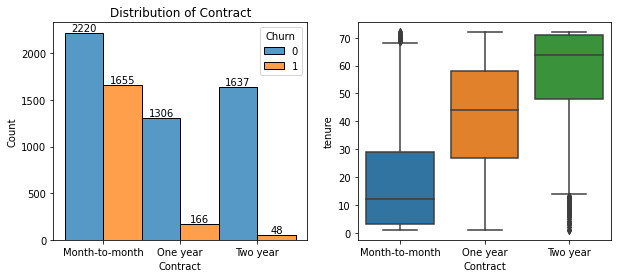

In [284]:
# plot histogram 
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax = sns.histplot(data=telco, x='Contract', hue="Churn", multiple="dodge", ax=axs[0])
ax.set(title='Distribution of Contract')
# label each bar in histogram
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+20, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

# boxplots of tenure by contract
sns.boxplot(data=telco, y='tenure', x='Contract', ax=axs[1])

plt.show()

### 2.5 - Customer Purchase Info

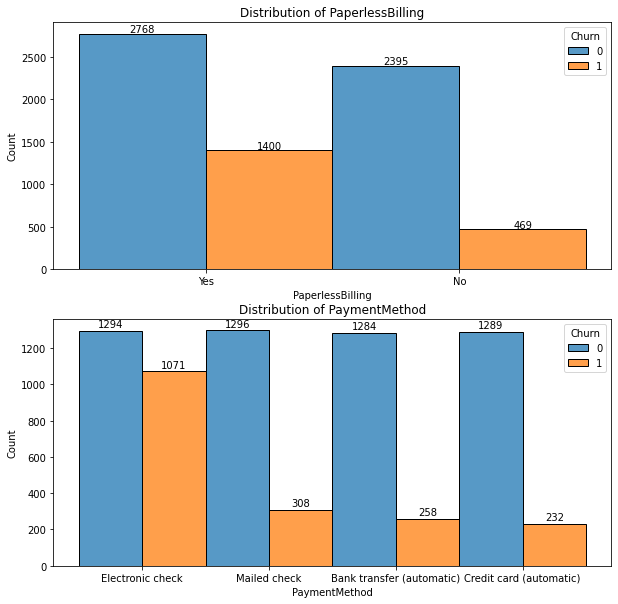

In [285]:
# plot histogram 
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
index = [axs[0],axs[1]]
for i,j in zip(["PaperlessBilling", "PaymentMethod"],index):
  ax = sns.histplot(data=telco, x=i, hue="Churn", multiple="dodge", ax=j)
  ax.set(title='Distribution of {}'.format(i))
  # label each bar in histogram
  for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+20, # y-coordinate position of data label, padded 20 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
plt.show()  

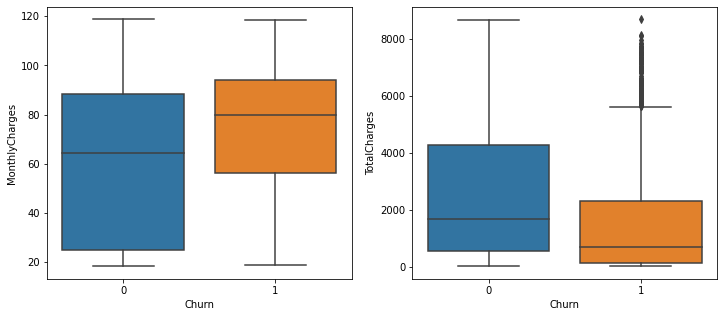

In [286]:
# boxplot of monthlycharges and totalcharges by churn status
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

y5 = sns.boxplot(data=telco, y='MonthlyCharges', x='Churn', ax=axs[0])
y6 = sns.boxplot(data=telco, y='TotalCharges', x='Churn', ax=axs[1])

plt.show()

### 2.6 - Numerical Features

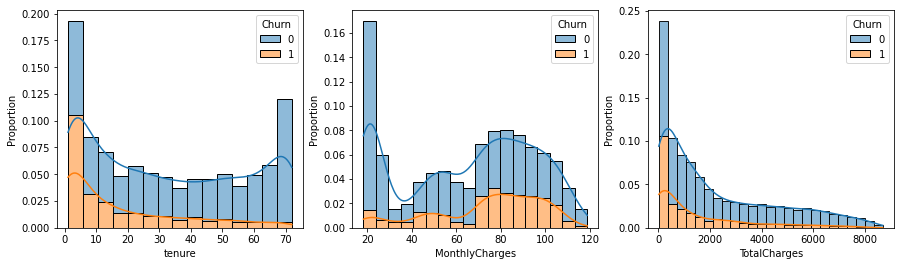

In [287]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

y1 = sns.histplot(data=telco, x="tenure", hue='Churn', kde=True, multiple='stack', stat='proportion', ax=axs[0])
y2 = sns.histplot(data=telco, x="MonthlyCharges", hue='Churn', kde=True, multiple='stack', stat='proportion', ax=axs[1])
y3 = sns.histplot(data=telco, x="TotalCharges", hue='Churn', kde=True, multiple='stack', stat='proportion', ax=axs[2])

plt.show()

In [288]:
telco[["tenure","MonthlyCharges","TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 2.7 - Correlation between Features

In [289]:
cols_lst = list(telco.columns)
cols_lst.remove('tenure')
cols_lst.remove('MonthlyCharges')
cols_lst.remove('TotalCharges')
cols_lst.remove('Churn')
cols_lst.remove('customerID')

In [290]:
cramers_v_table = pd.DataFrame(columns=['var1', 'var2', 'cramers_v'])

In [291]:
# define function to calculate bias-corrected Cramer's V
# code adapted from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [292]:
# Cramer's V for each pair of categorical features
for i in range(len(cols_lst)):
  for j in range(len(cols_lst)):
    if cols_lst[i]!=cols_lst[j]:
      contingency_table = pd.crosstab(telco[cols_lst[i]], telco[cols_lst[j]])
      data = pd.DataFrame({'var1':[cols_lst[i]],
                     'var2':[cols_lst[j]],
                     'cramers_v':[cramers_corrected_stat(contingency_table)]})
      cramers_v_table = cramers_v_table.append(data, ignore_index=True)

In [293]:
cramers_v_table.sort_values(by='cramers_v',ascending=False)

,var1,var2,cramers_v
79,MultipleLines,PhoneService,0.999929
64,PhoneService,MultipleLines,0.999929
191,StreamingMovies,StreamingTV,0.771132
176,StreamingTV,StreamingMovies,0.771132
146,DeviceProtection,StreamingMovies,0.736063
...,...,...,...
72,PhoneService,Contract,0.000000
63,PhoneService,Dependents,0.000000
61,PhoneService,SeniorCitizen,0.000000
60,PhoneService,gender,0.000000


In [294]:
# Pearson correlation coefficient between tenure, monthlycharges and totalcharges
cor_mat = telco[['tenure','MonthlyCharges','TotalCharges']].corr()
round(cor_mat, 2)

,tenure,MonthlyCharges,TotalCharges
tenure,1.00,0.25,0.83
MonthlyCharges,0.25,1.00,0.65
TotalCharges,0.83,0.65,1.00


## 3 - Model and Analysis

### 3.1 - Compare Standardization and Normalization
compare test accuracy of models using Standardization vs Normalization,  
for Standardization, use StandardScaler() in ColumnTransformer;   
for Normalization, use MinMaxScaler() in ColumnTransformer; 

In [295]:
# Divide into features and labels
x = telco.drop(['customerID','Churn'], axis=1) 
y = telco.Churn

# one hot encode categorical features, Standardize the 3 Numerical Features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

categorical_features = x.columns.tolist()
categorical_features.remove('tenure')
categorical_features.remove('MonthlyCharges')
categorical_features.remove('TotalCharges')

# standardization: use StandardScaler()
# normalization: use MinMaxScaler()
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
ct = ColumnTransformer([("Categorical", OneHotEncoder(), categorical_features), # use OneHotEncoder on categorical features
                        ("Numerical", MinMaxScaler(), numerical_features)], remainder = 'passthrough') 
x_trans = ct.fit_transform(x) # 46 features in x_trans (43 binary encoder + tenure, monthlycharges, totalcharges)

In [296]:
# get the column names in the transformed x
feature_names = ct.get_feature_names_out()
feature_names

array(['Categorical__gender_Female', 'Categorical__gender_Male',
       'Categorical__SeniorCitizen_No', 'Categorical__SeniorCitizen_Yes',
       'Categorical__Partner_No', 'Categorical__Partner_Yes',
       'Categorical__Dependents_No', 'Categorical__Dependents_Yes',
       'Categorical__PhoneService_No', 'Categorical__PhoneService_Yes',
       'Categorical__MultipleLines_No',
       'Categorical__MultipleLines_No phone service',
       'Categorical__MultipleLines_Yes',
       'Categorical__InternetService_DSL',
       'Categorical__InternetService_Fiber optic',
       'Categorical__InternetService_No',
       'Categorical__OnlineSecurity_No',
       'Categorical__OnlineSecurity_No internet service',
       'Categorical__OnlineSecurity_Yes', 'Categorical__OnlineBackup_No',
       'Categorical__OnlineBackup_No internet service',
       'Categorical__OnlineBackup_Yes',
       'Categorical__DeviceProtection_No',
       'Categorical__DeviceProtection_No internet service',
       'Categori

In [297]:
# standardization: verify the 3 features have unit variance
# normalization: verify the 3 features are in range (0,1)
# the last 3 columns in x_trans correspond to the 3 transformed numerical features
pd.DataFrame(x_trans).iloc[:,-3:].describe()

,43,44,45
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


#### 3.1.1 -  Train-Test Split

In [298]:
# Divide into Training and Testing Data, we'll use 80/20 split here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.2, random_state=1)

In [299]:
# check how balanced the training set is
y_train.value_counts()

0    4122
1    1503
Name: Churn, dtype: int64

In [300]:
from sklearn.metrics import confusion_matrix, classification_report

#### 3.1.2 - SVM

In [301]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma="auto")
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(svm.score(x_train,y_train)*100,2)))

Test Accuracy: 80.1%
Train Accuracy: 80.85%


#### 3.1.3 - Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver="newton-cg")
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(lr.score(x_train,y_train)*100,2)))

Test Accuracy: 79.74%
Train Accuracy: 80.62%


#### 3.1.4 - Random Forest

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(rf.score(x_train,y_train)*100,2)))

Test Accuracy: 78.68%
Train Accuracy: 99.77%


### 3.2 - Feature Selection

In [304]:
# isolate numerical and categorical features in the training set and test set
x_train_num = pd.DataFrame(x_train).iloc[:,-3:].to_numpy() # select last 3 numerical columns
x_train_cat = pd.DataFrame(x_train).iloc[:,:-3].to_numpy() # remove last 3 numerical columns

x_test_num = pd.DataFrame(x_test).iloc[:,-3:].to_numpy() # select last 3 numerical columns
x_test_cat = pd.DataFrame(x_test).iloc[:,:-3].to_numpy() # remove last 3 numerical columns

In [305]:
x_train_cat.shape, x_train_num.shape, x_test_cat.shape, x_test_num.shape

((5625, 43), (5625, 3), (1407, 43), (1407, 3))

#### 3.2.1 - Chi-Squared Test for Categorical Features

In [306]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SelectKBest removes all but the k highest scoring features, here we keep all features first to compare their scores
fs = SelectKBest(score_func=chi2, k='all') 
fs.fit(x_train_cat, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7faca60478b0>)

Feature 0: 0.290144
Feature 1: 0.284727
Feature 2: 23.113927
Feature 3: 118.054196
Feature 4: 59.782287
Feature 5: 64.671956
Feature 6: 44.118415
Feature 7: 103.687471
Feature 8: 0.254653
Feature 9: 0.026600
Feature 10: 3.508879
Feature 11: 0.254653
Feature 12: 4.914461
Feature 13: 52.668644
Feature 14: 291.627946
Feature 15: 234.349987
Feature 16: 324.449078
Feature 17: 234.349987
Feature 18: 111.154431
Feature 19: 217.970253
Feature 20: 234.349987
Feature 21: 20.878234
Feature 22: 191.140741
Feature 23: 234.349987
Feature 24: 12.575806
Feature 25: 324.174246
Feature 26: 234.349987
Feature 27: 103.005221
Feature 28: 55.539611
Feature 29: 234.349987
Feature 30: 14.701995
Feature 31: 48.716075
Feature 32: 234.349987
Feature 33: 18.538214
Feature 34: 408.834318
Feature 35: 132.651215
Feature 36: 391.922279
Feature 37: 119.199703
Feature 38: 82.211631
Feature 39: 63.870897
Feature 40: 67.192624
Feature 41: 344.910189
Feature 42: 45.609409


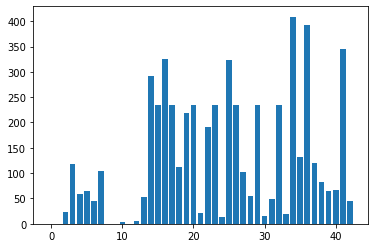

In [307]:
# score is Chi2 statistics for each feature.
# We can then print the scores for each variable (largest is better), and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 0.590128
Feature 1: 0.593619
Feature 2: 0.000002
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.613818
Feature 9: 0.870443
Feature 10: 0.061041
Feature 11: 0.613818
Feature 12: 0.026633
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.000005
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 0.000391
Feature 25: 0.000000
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000126
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.000017
Feature 34: 0.000000
Feature 35: 0.000000
Feature 36: 0.000000
Feature 37: 0.000000
Feature 38: 0.000000
Feature 39: 0.000000
Feature 40: 0.000000
Feature 41: 0.000000
Feature 42: 0.000000


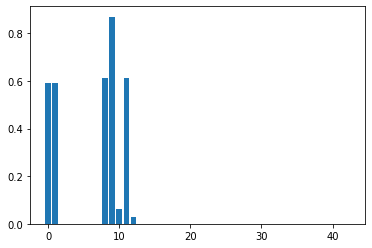

In [308]:
# We can then print the scores for each variable 

# what are pvalues for the features
for i in range(len(fs.pvalues_)):
 print('Feature %d: %f' % (i, fs.pvalues_[i]))
# plot the pvalues
plt.bar([i for i in range(len(fs.pvalues_))], fs.pvalues_)
plt.show()

In [309]:
# we use a threshold of 0.05 to select significant features (pvalue<0.05 means significant)
threshold = 0.05

n = 0
index_lst_chi = []
for i in range(len(fs.pvalues_)):
 if fs.pvalues_[i]<0.05:
   n+=1
 else:
   index_lst_chi.append(i)  # store indices of insignificant features 
n   

37

In [310]:
# we see that there are n categorical features with pvalue<0.05, 
# hence we can select the top n highest scoring categorical features
fs = SelectKBest(score_func=chi2, k=n) 
fs.fit(x_train_cat, y_train)
# x_train_cat_fs = fs.transform(x_train_cat) # returns a transformed version of x_train_cat
# x_test_cat_fs = fs.transform(x_test_cat) # returns a transformed version of x_test_cat

SelectKBest(k=37, score_func=<function chi2 at 0x7faca60478b0>)

In [311]:
# x_train_cat_fs.shape, x_test_cat_fs.shape

In [312]:
# specifically, the insignificant categorical features are
feature_names[index_lst_chi]

array(['Categorical__gender_Female', 'Categorical__gender_Male',
       'Categorical__PhoneService_No', 'Categorical__PhoneService_Yes',
       'Categorical__MultipleLines_No',
       'Categorical__MultipleLines_No phone service'], dtype=object)

#### 3.2.2 - ANOVA F-Test for Numerical Features

In [313]:
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k='all') 
fs.fit(x_train_num, y_train)

SelectKBest(k='all')

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000


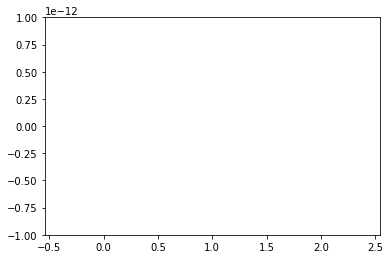

In [314]:
# P-values associated with the F-statistic (score).
# We can then print the scores for each variable 

# what are pvalues for the features
for i in range(len(fs.pvalues_)):
 print('Feature %d: %f' % (i, fs.pvalues_[i]))
# plot the pvalues
plt.bar([i for i in range(len(fs.pvalues_))], fs.pvalues_)
plt.show()

In [315]:
# we use a threshold of 0.05 to select significant features (pvalue<0.05 means significant)
threshold = 0.05

n = 0
index_lst_anova = []
for i in range(len(fs.pvalues_)):
 if fs.pvalues_[i]<0.05:
   n+=1
 else:
   index_lst_anova.append(i)  # store indices of insignificant features 
n  

3

In [316]:
# we see that all 3 numerical features are significant, 
# hence we include all 3 numerical features

#### 3.2.3 - Mutual Information (MI) for Both Types of Features

In [317]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.012438,0.000081
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.915493,0.022886,0.154431
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.985915,0.717910,0.767280
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.819900,0.844132
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.274627,0.003121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.253521,0.468657,0.139978
5621,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.971831,0.878109,0.851396
5622,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.140845,0.579602,0.094525
5623,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.014085,0.359701,0.010997


In [318]:
from sklearn.feature_selection import mutual_info_classif

def mutual_info_classif_custom(X, y):
    # To change discrete_features, 
    # you need to redefine the function each time
    # Because once the func def is supplied to selectKBest, it cant be changed
    discrete_features_index = list(range(0,43)) # columns 0 to 42 in x_train are categorical

    return mutual_info_classif(X, y, discrete_features=discrete_features_index, random_state=1)

fs = SelectKBest(score_func=mutual_info_classif_custom, k='all') 
fs.fit(x_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif_custom at 0x7faca418f700>)

Feature 0: 0.000051
Feature 1: 0.000051
Feature 2: 0.011645
Feature 3: 0.011645
Feature 4: 0.011199
Feature 5: 0.011199
Feature 6: 0.014075
Feature 7: 0.014075
Feature 8: 0.000025
Feature 9: 0.000025
Feature 10: 0.000598
Feature 11: 0.000025
Feature 12: 0.000761
Feature 13: 0.007394
Feature 14: 0.046782
Feature 15: 0.032169
Feature 16: 0.060260
Feature 17: 0.032169
Feature 18: 0.014944
Feature 19: 0.034585
Feature 20: 0.032169
Feature 21: 0.002898
Feature 22: 0.030372
Feature 23: 0.032169
Feature 24: 0.001734
Feature 25: 0.058751
Feature 26: 0.032169
Feature 27: 0.013932
Feature 28: 0.008097
Feature 29: 0.032169
Feature 30: 0.002116
Feature 31: 0.007135
Feature 32: 0.032169
Feature 33: 0.002655
Feature 34: 0.089900
Feature 35: 0.016930
Feature 36: 0.060702
Feature 37: 0.018651
Feature 38: 0.018651
Feature 39: 0.007787
Feature 40: 0.008225
Feature 41: 0.044546
Feature 42: 0.005593
Feature 43: 0.073050
Feature 44: 0.044470
Feature 45: 0.042359


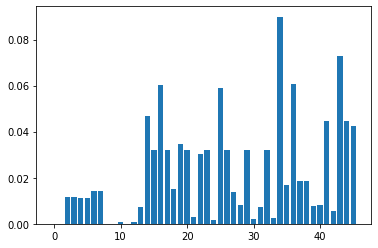

In [319]:
# score is the Estimated mutual information between each feature and the target.
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [320]:
# MI equals to zero if and only if two random variables are independent
# we see from above that there are features with a p-value really close to 0
# specifically, we use a cut off value of 0.001, i.e. features with MI < 0.001 are insignificant
n = 0
index_lst_mi = []
for i in range(len(fs.scores_)):
 if fs.scores_[i]<0.001:
   n+=1
   index_lst_mi.append(i) # store indices of insignificant features
  
n  

7

In [321]:
# specifically, the insignificant categorical features are
feature_names[index_lst_mi]

array(['Categorical__gender_Female', 'Categorical__gender_Male',
       'Categorical__PhoneService_No', 'Categorical__PhoneService_Yes',
       'Categorical__MultipleLines_No',
       'Categorical__MultipleLines_No phone service',
       'Categorical__MultipleLines_Yes'], dtype=object)

### 3.3 - Model Fitting
use features selected based on MI

In [322]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
x_train_fs = x_train_df.drop(x_train_df.columns[index_lst_mi],axis = 1).to_numpy() # remove insignificant features in x_train
x_test_fs = x_test_df.drop(x_test_df.columns[index_lst_mi],axis = 1).to_numpy() # remove insignificant features in x_test

In [323]:
x_train_fs.shape, x_test_fs.shape

((5625, 39), (1407, 39))

#### 3.3.1 -bold text Does Not Apply ADASYN

##### 3.3.1.1 - SVM

In [324]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma="auto")
svm.fit(x_train_fs,y_train)
predictions = svm.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(svm.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(svm.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 79.74%
Train Accuracy: 80.0%


##### 3.3.1.2 - Logistic Regression

In [325]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver="newton-cg")
lr.fit(x_train_fs,y_train)
predictions = lr.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(lr.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(lr.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 79.53%
Train Accuracy: 80.59%


##### 3.3.1.3 - Random Forest

In [326]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train_fs,y_train)
predictions = rf.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(rf.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(rf.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 77.61%
Train Accuracy: 99.73%


#### 3.3.2 - Balance Classes by ADASYN Oversampling

In [327]:
# oversample the training set using ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=1)
x_train_ada, y_train_ada = ada.fit_resample(x_train_fs, y_train)

In [328]:
# confirm training dataset is now balanced
y_train_ada.value_counts()

0    4122
1    4034
Name: Churn, dtype: int64

In [329]:
x_train_ada.shape

(8156, 39)

In [330]:
x_train_fs.shape

(5625, 39)

##### 3.3.2.1 - SVM

In [331]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma="auto")
svm.fit(x_train_ada,y_train_ada)
predictions = svm.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(svm.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(svm.score(x_train_ada,y_train_ada)*100,2)))

Test Accuracy: 71.64%
Train Accuracy: 73.05%


##### 3.3.2.2 - Logistic Regression

In [332]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver="newton-cg")
lr.fit(x_train_ada,y_train_ada)
predictions = lr.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(lr.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(lr.score(x_train_ada,y_train_ada)*100,2)))

Test Accuracy: 73.7%
Train Accuracy: 73.69%


##### 3.3.2.3 - Random Forest

In [333]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train_ada,y_train_ada)
predictions = rf.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(rf.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(rf.score(x_train_ada,y_train_ada)*100,2)))

Test Accuracy: 76.4%
Train Accuracy: 99.82%


### 3.4 - Multicollinearity

#### 3.4.1 - Remove Tenure

In [334]:
new_index = index_lst_mi+[43]
new_index, index_lst_mi

([0, 1, 8, 9, 10, 11, 12, 43], [0, 1, 8, 9, 10, 11, 12])

In [335]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
x_train_fs = x_train_df.drop(x_train_df.columns[new_index],axis = 1).to_numpy() # remove insignificant features in x_train
x_test_fs = x_test_df.drop(x_test_df.columns[new_index],axis = 1).to_numpy() # remove insignificant features in x_test

In [336]:
x_train_fs.shape, x_test_fs.shape

((5625, 38), (1407, 38))

##### 3.4.1.1 - SVM

In [337]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma="auto")
svm.fit(x_train_fs,y_train)
predictions = svm.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(svm.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(svm.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 80.1%
Train Accuracy: 79.4%


##### 3.4.1.2 - Logistic Regression

In [338]:
|from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver="newton-cg")
lr.fit(x_train_fs,y_train)
predictions = lr.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(lr.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(lr.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 78.96%
Train Accuracy: 79.95%


##### 3.4.1.3 - Random Forest

In [339]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train_fs,y_train)
predictions = rf.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(rf.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(rf.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 76.9%
Train Accuracy: 99.73%


#### 3.4.2 - Remove TotalCharges

In [340]:
new_index = index_lst_mi+[45]
new_index, index_lst_mi

([0, 1, 8, 9, 10, 11, 12, 45], [0, 1, 8, 9, 10, 11, 12])

In [341]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
x_train_fs = x_train_df.drop(x_train_df.columns[new_index],axis = 1).to_numpy() # remove insignificant features in x_train
x_test_fs = x_test_df.drop(x_test_df.columns[new_index],axis = 1).to_numpy() # remove insignificant features in x_test

In [342]:
x_train_fs.shape, x_test_fs.shape

((5625, 38), (1407, 38))

##### 3.4.2.1 - SVM

In [343]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma="auto")
svm.fit(x_train_fs,y_train)
predictions = svm.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(svm.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(svm.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 80.03%
Train Accuracy: 80.04%


In [344]:
# Support is the number of actual occurrences of the class in the specified dataset. 
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
# 0: negative, 1: positive
print(classification_report(y_true=y_test, y_pred=predictions, labels=[0,1], digits=4))

              precision    recall  f1-score   support

           0     0.8333    0.9126    0.8712      1041
           1     0.6592    0.4809    0.5561       366

    accuracy                         0.8003      1407
   macro avg     0.7463    0.6967    0.7136      1407
weighted avg     0.7880    0.8003    0.7892      1407



In [345]:
# cij is equal to the number of observations known to be in group i and predicted to be in group j
# in binary classification, the count of true negatives is C00, 
# false negatives is C10, true positives is C11 and false positives is C01.
confusion_matrix(y_true=y_test,y_pred=predictions)

array([[950,  91],
       [190, 176]])

##### 3.4.2.2 - Logistic Regression

In [346]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver="newton-cg")
lr.fit(x_train_fs,y_train)
predictions = lr.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(lr.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(lr.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 79.32%
Train Accuracy: 80.6%


In [347]:
# Support is the number of actual occurrences of the class in the specified dataset. 
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
print(classification_report(y_true=y_test, y_pred=predictions, labels=[0,1], digits=4))

              precision    recall  f1-score   support

           0     0.8422    0.8866    0.8638      1041
           1     0.6206    0.5273    0.5702       366

    accuracy                         0.7932      1407
   macro avg     0.7314    0.7070    0.7170      1407
weighted avg     0.7845    0.7932    0.7874      1407



In [348]:
# cij is equal to the number of observations known to be in group i and predicted to be in group j
# in binary classification, the count of true negatives is C00, 
# false negatives is C10, true positives is C11 and false positives is C01.
confusion_matrix(y_true=y_test,y_pred=predictions)

array([[923, 118],
       [173, 193]])

##### 3.4.2.3 - Random Forest

In [349]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train_fs,y_train)
predictions = rf.predict(x_test_fs)
print("Test Accuracy: {}%".format(round(rf.score(x_test_fs,y_test)*100,2)))
print("Train Accuracy: {}%".format(round(rf.score(x_train_fs,y_train)*100,2)))

Test Accuracy: 77.61%
Train Accuracy: 99.68%


In [350]:
# Support is the number of actual occurrences of the class in the specified dataset. 
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
print(classification_report(y_true=y_test, y_pred=predictions, labels=[0,1], digits=4))

              precision    recall  f1-score   support

           0     0.8247    0.8857    0.8541      1041
           1     0.5882    0.4645    0.5191       366

    accuracy                         0.7761      1407
   macro avg     0.7065    0.6751    0.6866      1407
weighted avg     0.7632    0.7761    0.7670      1407



In [351]:
 # cij is equal to the number of observations known to be in group i and predicted to be in group j
# in binary classification, the count of true negatives is C00, 
# false negatives is C10, true positives is C11 and false positives is C01.
confusion_matrix(y_true=y_test,y_pred=predictions)

array([[922, 119],
       [196, 170]])

### Additional Analysis: Hyperparameter Tuning
hyperparameter tuning on the entire dataset

In [352]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [353]:
x_df = pd.DataFrame(x_trans)
x_fs = x_df.drop(x_df.columns[new_index],axis = 1).to_numpy() # remove insignificant features in x

In [354]:
x_fs.shape

(7032, 38)

#### A.1 - SVM

In [355]:
# defining parameter range
param_grid = {'C': [100, 10, 1.0, 0.1, 0.001], 
              'gamma': ['scale'],
              'kernel': ['poly', 'rbf', 'sigmoid']} 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  
grid_svm = GridSearchCV(estimator=SVC(random_state=1), param_grid=param_grid, cv=cv, scoring='accuracy',error_score=0)
  
# fitting the model for grid search
grid_result = grid_svm.fit(x_fs, y)

In [356]:
# summarize results
# Running the example a few times using cross validation and compare the average outcome.
# Running the example prints the best result as well as the results from all combinations evaluated.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793515 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.761518 (0.013371) with: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.750143 (0.014353) with: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.726344 (0.014246) with: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.778869 (0.011846) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.782045 (0.011611) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.727198 (0.013776) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.793515 (0.012012) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.792567 (0.013458) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.724874 (0.012200) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.792236 (0.014154) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.789534 (0.012722) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.747817 (0.011738) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.734215 (0.000428) with: {'C': 0.001, 'gamma': 'sc

In [357]:
# print best parameter after tuning
print(grid_svm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
SVC(kernel='poly', random_state=1)


In [358]:
grid_svm_predictions = grid_svm.predict(x_fs)
  
# print classification report
print(classification_report(y, grid_svm_predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8494    0.9076    0.8775      5163
           1     0.6851    0.5554    0.6135      1869

    accuracy                         0.8140      7032
   macro avg     0.7673    0.7315    0.7455      7032
weighted avg     0.8057    0.8140    0.8073      7032



In [368]:
# we see that the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.
# defining parameter range
param_grid = {'C': [1.0], 
              'gamma': ['scale'],
              'kernel': ['poly'],
              'degree': [1,2,3,4,5]} 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  
grid_svm = GridSearchCV(estimator=SVC(random_state=1), param_grid=param_grid, cv=cv, scoring='accuracy',error_score=0)
  
# fitting the model for grid search
grid_result = grid_svm.fit(x_fs, y)

In [369]:
# summarize results
# Running the example a few times using cross validation and compare the average outcome.
# Running the example prints the best result as well as the results from all combinations evaluated.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799441 using {'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.799441 (0.012204) with: {'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.797876 (0.014144) with: {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.793515 (0.012012) with: {'C': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.784082 (0.012415) with: {'C': 1.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
0.767114 (0.012453) with: {'C': 1.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [370]:
grid_svm_predictions = grid_svm.predict(x_fs)
  
# print classification report
print(classification_report(y, grid_svm_predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8429    0.8970    0.8691      5163
           1     0.6541    0.5383    0.5905      1869

    accuracy                         0.8016      7032
   macro avg     0.7485    0.7176    0.7298      7032
weighted avg     0.7927    0.8016    0.7951      7032



#### A.2 - Logistic Regression

In [378]:
# defining parameter range
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], 
              'solver': ['liblinear', 'newton-cg', 'lbfgs'],
              'penalty': ['l2']} 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)    
grid_lr = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=cv, scoring='accuracy',error_score=0)
  
# fitting the model for grid search
grid_result = grid_lr.fit(x_fs, y)

In [379]:
# summarize results
# Running the example a few times using cross validation and compare the average outcome.
# Running the example prints the best result as well as the results from all combinations evaluated.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802711 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.802285 (0.013598) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.802143 (0.013565) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802142 (0.013546) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802237 (0.013596) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.802237 (0.013533) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802190 (0.013544) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802711 (0.013214) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.802711 (0.013169) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802711 (0.013169) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802000 (0.012347) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.801953 (0.012484) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801953 (0.012484) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.795981 (0.012939) wit

In [380]:
# print best parameter after tuning
print(grid_lr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_lr.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(random_state=1, solver='liblinear')


In [381]:
grid_lr_predictions = grid_lr.predict(x_fs)
  
# print classification report
print(classification_report(y, grid_lr_predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8454    0.8972    0.8705      5163
           1     0.6581    0.5468    0.5973      1869

    accuracy                         0.8040      7032
   macro avg     0.7517    0.7220    0.7339      7032
weighted avg     0.7956    0.8040    0.7979      7032



#### A.3 - Random Forest

In [382]:
# defining parameter range
param_grid = {'n_estimators': [10, 100, 1000],
              'max_features': ['sqrt', 'log2']
} 
  
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv=cv, scoring='accuracy',error_score=0)
  
# fitting the model for grid search
grid_result = grid_rf.fit(x_fs, y)

In [383]:
# summarize results
# Running the example a few times using cross validation and compare the average outcome.
# Running the example prints the best result as well as the results from all combinations evaluated.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.779389 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.771236 (0.012396) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.777445 (0.012961) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.779389 (0.012398) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.770523 (0.013295) with: {'max_features': 'log2', 'n_estimators': 10}
0.777824 (0.011725) with: {'max_features': 'log2', 'n_estimators': 100}
0.778773 (0.011516) with: {'max_features': 'log2', 'n_estimators': 1000}


In [384]:
# print best parameter after tuning
print(grid_rf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

{'max_features': 'sqrt', 'n_estimators': 1000}
RandomForestClassifier(max_features='sqrt', n_estimators=1000, random_state=1)


In [385]:
grid_rf_predictions = grid_rf.predict(x_fs)
  
# print classification report
print(classification_report(y, grid_rf_predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9969    0.9981    0.9975      5163
           1     0.9946    0.9914    0.9930      1869

    accuracy                         0.9963      7032
   macro avg     0.9958    0.9948    0.9953      7032
weighted avg     0.9963    0.9963    0.9963      7032

